In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://randomuser.me/api/?results=30"
response = requests.get(url)

if response.status_code == 200:
  data = response.json()
else:
  print("Error: ", response.status_code)

In [3]:
users = data["results"]
users[0]

{'gender': 'male',
 'name': {'title': 'Mr', 'first': 'آراد', 'last': 'رضاییان'},
 'location': {'street': {'number': 105, 'name': 'شهید استاد حسن بنا'},
  'city': 'ایلام',
  'state': 'کرمان',
  'country': 'Iran',
  'postcode': 56626,
  'coordinates': {'latitude': '16.5003', 'longitude': '-50.8951'},
  'timezone': {'offset': '+5:30',
   'description': 'Bombay, Calcutta, Madras, New Delhi'}},
 'email': 'ard.rdyyn@example.com',
 'login': {'uuid': '03b062d8-e2e3-42c6-ab4d-537b6a2bb7db',
  'username': 'brownsnake407',
  'password': 'reagan',
  'salt': '5i5nkWy6',
  'md5': 'bf2bf1368bab1028ead45e44dbac7fea',
  'sha1': '06cdc8ca7a88dcd71b51ec0566e8979985f2a542',
  'sha256': 'b345dfea97d7edc0a5faadf49527d5383d4919134f903c8d2646b743409509b6'},
 'dob': {'date': '1958-10-15T06:56:31.459Z', 'age': 66},
 'registered': {'date': '2011-11-08T10:57:42.422Z', 'age': 12},
 'phone': '036-17748758',
 'cell': '0964-876-9419',
 'id': {'name': '', 'value': None},
 'picture': {'large': 'https://randomuser.me/ap

In [4]:
df_users = pd.json_normalize(users)
df_users.head(2)

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,...,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,male,ard.rdyyn@example.com,036-17748758,0964-876-9419,IR,Mr,آراد,رضاییان,105,شهید استاد حسن بنا,...,b345dfea97d7edc0a5faadf49527d5383d4919134f903c...,1958-10-15T06:56:31.459Z,66,2011-11-08T10:57:42.422Z,12,,None,https://randomuser.me/api/portraits/men/74.jpg,https://randomuser.me/api/portraits/med/men/74...,https://randomuser.me/api/portraits/thumb/men/...
1,male,edgar.kim@example.com,(395) 596-0809,(626) 757-1919,US,Mr,Edgar,Kim,2937,Timber Wolf Trail,...,72e8d9c81495b30a20943ec4a71d7d9c88370a207d7a05...,1944-11-22T11:00:38.996Z,79,2011-12-04T00:52:18.522Z,12,SSN,832-94-8283,https://randomuser.me/api/portraits/men/50.jpg,https://randomuser.me/api/portraits/med/men/50...,https://randomuser.me/api/portraits/thumb/men/...


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          30 non-null     object
 1   email                           30 non-null     object
 2   phone                           30 non-null     object
 3   cell                            30 non-null     object
 4   nat                             30 non-null     object
 5   name.title                      30 non-null     object
 6   name.first                      30 non-null     object
 7   name.last                       30 non-null     object
 8   location.street.number          30 non-null     int64 
 9   location.street.name            30 non-null     object
 10  location.city                   30 non-null     object
 11  location.state                  30 non-null     object
 12  location.country                30 non-null     obje

In [10]:
df_gender_age = df_users[["gender", "dob.age"]]
df_gender_age.columns = ["Genero", "Edad"]
df_gender_age

,Genero,Edad
0,male,66
1,male,79
2,male,65
3,female,75
4,male,47
5,female,23
6,male,38
7,male,43
8,male,37
9,female,79


In [22]:
avg_age_per_gender = df_gender_age.groupby("Genero")["Edad"].mean()
avg_age_per_gender

,Edad
Genero,
female,61.250000
male,50.333333


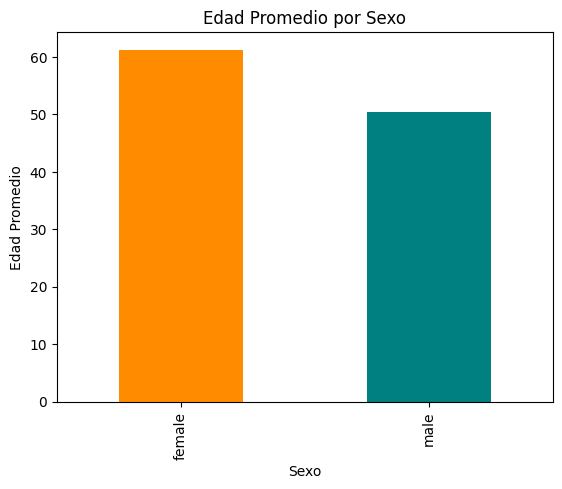

In [24]:
avg_age_per_gender.plot(kind="bar", color=["DarkOrange", "teal"])
plt.title("Edad Promedio por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Edad Promedio")
plt.show()

# Ejercicios (0.5 por ejercicio)

1. Gráfico de barras para mostrar la sumatoria de reviews por año

2. Mostrar gráfico de los 10 autores de ficción con mejor rating promedio y mayor numero de reviews acumuladas del año 2019.
